# clasificacion 

## Importacion de librerias y carga de datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib

## Importar datos

In [2]:
data = pd.read_csv("datacl.csv")
data =data.iloc[:,1:]

In [3]:
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


## Clasificacion de variables
Se clasifican las variables, lo cual nos ayudara a escoger que tipo de algoritmo usar dependeindo de su clasificacion

In [4]:
Cuantitativas_continuas =  data.loc[:,["LBE", "AC", "FM", "UC", "ASTV", 'MSTV', 'ALTV', 'MLTV',  'Width', 'Min', 'Max', 'Mode', 'Mean', 'Median', 'Variance']]
Cuantitativas_continuas

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Mode,Mean,Median,Variance
0,120,0,0,0,73,0.5,43,2.4,64,62,126,120,137,121,73
1,132,4,0,4,17,2.1,0,10.4,130,68,198,141,136,140,12
2,133,2,0,5,16,2.1,0,13.4,130,68,198,141,135,138,13
3,134,2,0,6,16,2.4,0,23.0,117,53,170,137,134,137,13
4,132,4,0,5,16,2.4,0,19.9,117,53,170,137,136,138,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0,0,6,79,0.2,25,7.2,40,137,177,153,150,152,2
2122,140,1,0,9,78,0.4,22,7.1,66,103,169,152,148,151,3
2123,140,1,0,7,79,0.4,20,6.1,67,103,170,153,148,152,4
2124,140,1,0,9,78,0.4,27,7.0,66,103,169,152,147,151,4


In [5]:
Cuantitativa_discreta =  data.loc[:,["Nmax", "Nzeros", "DL", "DS","DP" ]]
Cuantitativa_discreta

,Nmax,Nzeros,DL,DS,DP
0,2,0,0,0,0
1,6,1,2,0,0
2,5,1,2,0,0
3,11,0,2,0,0
4,9,0,0,0,0
...,...,...,...,...,...
2121,4,0,0,0,0
2122,6,0,0,0,0
2123,5,0,0,0,0
2124,6,0,0,0,0


In [6]:
Cuantitativa_politomica =  data.loc[:,["Tendency","Target"]]
Cuantitativa_politomica

,Tendency,Target
0,1,1
1,0,0
2,0,0
3,1,0
4,1,0
...,...,...
2121,0,1
2122,1,1
2123,1,1
2124,1,1


## Gaussian

In [7]:
train = data.loc[:,["Target","ASTV","AC","LBE","UC","Min","Width"]]
# plt.figure(figsize=(20,10))
# sns.pairplot(train) 

In [8]:
x = train.loc[:,train.columns != "Target"]
y = train.loc[:,train.columns == "Target"]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size= 0.40, random_state= 0)

In [9]:
x

,ASTV,AC,LBE,UC,Min,Width
0,73,0,120,0,62,64
1,17,4,132,4,68,130
2,16,2,133,5,68,130
3,16,2,134,6,53,117
4,16,4,132,5,53,117
...,...,...,...,...,...,...
2121,79,0,140,6,137,40
2122,78,1,140,9,103,66
2123,79,1,140,7,103,67
2124,78,1,140,9,103,66


In [10]:
y

,Target
0,1
1,0
2,0
3,0
4,0
...,...
2121,1
2122,1
2123,1
2124,1


## Modelo

In [11]:
gnb = GaussianNB()
modelNB = gnb.fit(x_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(x_train)
y_pred_test = modelNB.predict_proba(x_test)

## Validacion

In [12]:
#Curva ROC y AUC para training
fpr_train,tpr_train,_ = roc_curve(y_train, y_pred_train[:,1])
roc_auc_train = auc (fpr_train, tpr_train)
#Curva ROC y AUC para test
fpr_test,tpr_test,_ = roc_curve(y_test, y_pred_test[:,1])
roc_auc_test = auc (fpr_test, tpr_test)

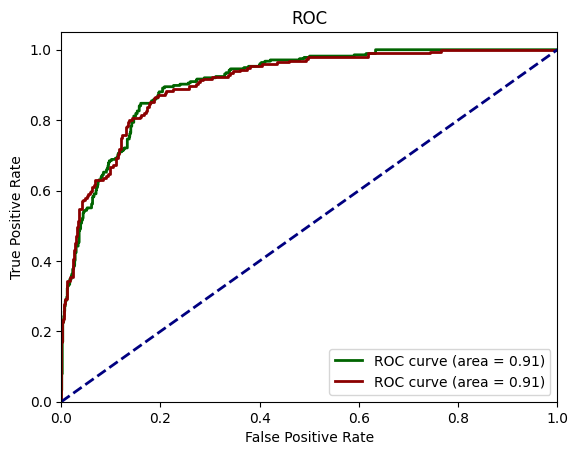

In [13]:
# Grafica
plt.figure()
lw = 2

plt.plot(fpr_train, tpr_train, color = "darkgreen", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test, tpr_test, color = "darkred", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0,1], [0,1], color = "navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

## Todas las Gaussian

In [14]:
Cuantitativas_continuas.columns

Index(['LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min',
       'Max', 'Mode', 'Mean', 'Median', 'Variance'],
      dtype='object')

In [15]:
train = data.loc[:,["Target",'LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min','Max', 'Mode', 'Mean', 'Median', 'Variance']]

In [16]:
x = train.loc[:,train.columns != "Target"]
y = train.loc[:,train.columns == "Target"]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size= 0.40, random_state= 0)

## Modelo

In [17]:
gnb = GaussianNB()
modelNB = gnb.fit(x_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(x_train)
y_pred_test = modelNB.predict_proba(x_test)

## Validacion

In [18]:
#Curva ROC y AUC para training
fpr_train,tpr_train,_ = roc_curve(y_train, y_pred_train[:,1])
roc_auc_train = auc (fpr_train, tpr_train)
#Curva ROC y AUC para test
fpr_test,tpr_test,_ = roc_curve(y_test, y_pred_test[:,1])
roc_auc_test = auc (fpr_test, tpr_test)

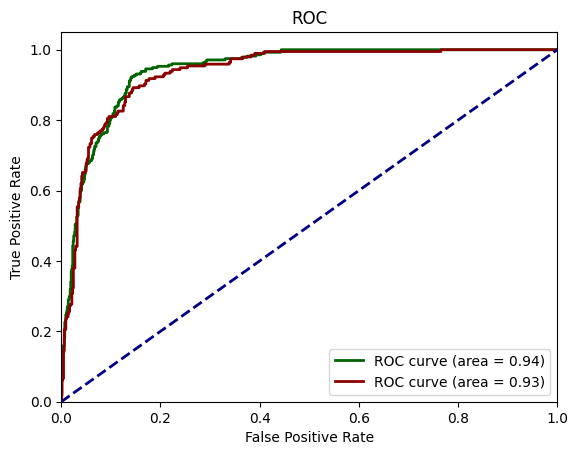

In [19]:
# Grafica
plt.figure()
lw = 2

plt.plot(fpr_train, tpr_train, color = "darkgreen", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test, tpr_test, color = "darkred", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0,1], [0,1], color = "navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

## Gaussian con discretas


In [20]:
Cuantitativas_continuas.columns

Index(['LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min',
       'Max', 'Mode', 'Mean', 'Median', 'Variance'],
      dtype='object')

In [21]:
Cuantitativa_discreta.columns

Index(['Nmax', 'Nzeros', 'DL', 'DS', 'DP'], dtype='object')

In [22]:
train = data.loc[:,["Target","ASTV","AC","LBE","UC","Min","Width","DP",'DS']]


In [23]:
x = train.loc[:,train.columns != "Target"]
y = train.loc[:,train.columns == "Target"]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size= 0.40, random_state= 0)

## Modelo

In [24]:
gnb = GaussianNB()
modelNB = gnb.fit(x_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(x_train)
y_pred_test = modelNB.predict_proba(x_test)

## Validacion

In [25]:
#Curva ROC y AUC para training
fpr_train,tpr_train,_ = roc_curve(y_train, y_pred_train[:,1])
roc_auc_train = auc (fpr_train, tpr_train)
#Curva ROC y AUC para test
fpr_test,tpr_test,_ = roc_curve(y_test, y_pred_test[:,1])
roc_auc_test = auc (fpr_test, tpr_test)

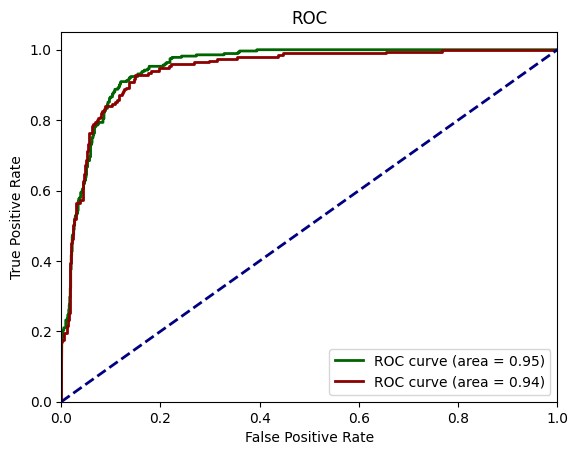

In [26]:
# Grafica
plt.figure()
lw = 2

plt.plot(fpr_train, tpr_train, color = "darkgreen", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test, tpr_test, color = "darkred", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0,1], [0,1], color = "navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

## Multinomial

In [27]:
Cuantitativa_discreta.columns

Index(['Nmax', 'Nzeros', 'DL', 'DS', 'DP'], dtype='object')

In [28]:
train = data.loc[:,["Target",'Nmax', 'Nzeros', 'DL', 'DS', 'DP']]
# plt.figure(figsize=(20,10))
# sns.pairplot(train) 

In [29]:
x = train.loc[:,train.columns != "Target"]
y = train.loc[:,train.columns == "Target"]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size= 0.40, random_state= 0)

## Modelo

In [30]:
# Modelizacion
gnb = MultinomialNB()
modelNB = gnb.fit(x_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(x_train)
y_pred_test = modelNB.predict_proba(x_test)

## Validacion

In [31]:
#Curva ROC y AUC para training
fpr_train,tpr_train,_ = roc_curve(y_train, y_pred_train[:,1])
roc_auc_train = auc (fpr_train, tpr_train)
#Curva ROC y AUC para test
fpr_test,tpr_test,_ = roc_curve(y_test, y_pred_test[:,1])
roc_auc_test = auc (fpr_test, tpr_test)

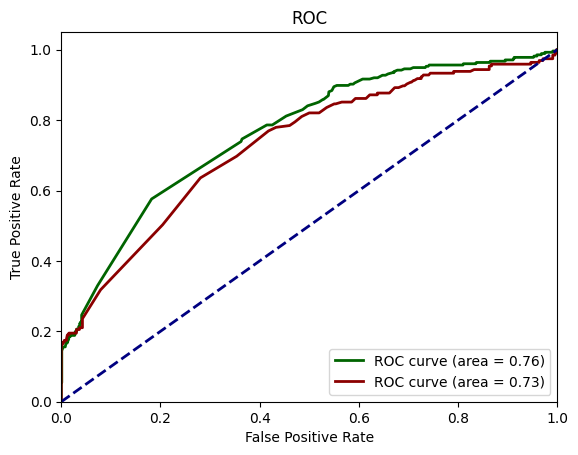

In [32]:
# Grafica
plt.figure()
lw = 2

plt.plot(fpr_train, tpr_train, color = "darkgreen", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test, tpr_test, color = "darkred", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0,1], [0,1], color = "navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Debido a que es muy bajo el procentaje de prediccion se intentarea de combinar con dos variables continuas para que en su mayoria sean cuantitativas

## Multinomial con continuas

In [33]:
Cuantitativa_discreta.columns

Index(['Nmax', 'Nzeros', 'DL', 'DS', 'DP'], dtype='object')

In [34]:
train = data.loc[:,['Target','ASTV','AC','Nmax', 'Nzeros', 'DL', 'DS', 'DP']]

In [35]:
x = train.loc[:,train.columns != "Target"]
y = train.loc[:,train.columns == "Target"]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size= 0.40, random_state= 0)

## Modelo

In [36]:
gnb = MultinomialNB()
modelNB = gnb.fit(x_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(x_train)
y_pred_test = modelNB.predict_proba(x_test)

## Validacion

In [37]:
#Curva ROC y AUC para training
fpr_train,tpr_train,_ = roc_curve(y_train, y_pred_train[:,1])
roc_auc_train = auc (fpr_train, tpr_train)
#Curva ROC y AUC para test
fpr_test,tpr_test,_ = roc_curve(y_test, y_pred_test[:,1])
roc_auc_test = auc (fpr_test, tpr_test)

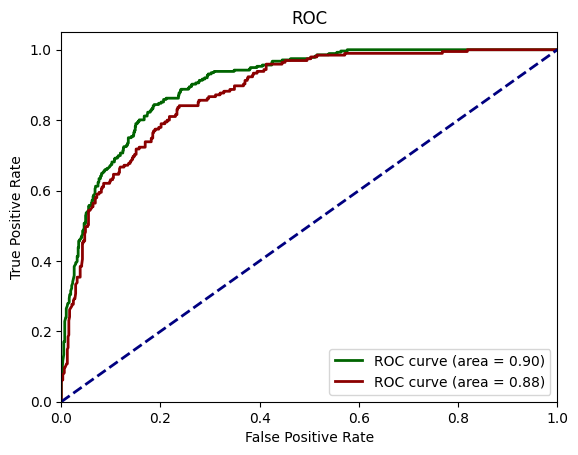

In [38]:
# Grafica
plt.figure()
lw = 2

plt.plot(fpr_train, tpr_train, color = "darkgreen", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test, tpr_test, color = "darkred", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0,1], [0,1], color = "navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Como se puede observar, el nivel aumento, siendo esto ams preciso y teniendo menos difernecias entre el train y el test

## SVM

In [39]:
model = SVC()

In [40]:
X = data.loc[:,data.columns != "Target"]
y = data.loc[:,data.columns == "Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)

In [41]:
X

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,120,0,0,0,73,0.5,43,2.4,0,0,...,64,62,126,2,0,120,137,121,73,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,130,68,198,6,1,141,136,140,12,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,130,68,198,5,1,141,135,138,13,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,117,53,170,11,0,137,134,137,13,1
4,132,4,0,5,16,2.4,0,19.9,0,0,...,117,53,170,9,0,137,136,138,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0,0,6,79,0.2,25,7.2,0,0,...,40,137,177,4,0,153,150,152,2,0
2122,140,1,0,9,78,0.4,22,7.1,0,0,...,66,103,169,6,0,152,148,151,3,1
2123,140,1,0,7,79,0.4,20,6.1,0,0,...,67,103,170,5,0,153,148,152,4,1
2124,140,1,0,9,78,0.4,27,7.0,0,0,...,66,103,169,6,0,152,147,151,4,1


In [42]:
param_grid = [
    {"kernel": ["rbf"], "gamma": [1,0.1,0.5,0.01,0.005], "C": [0.1,0.5,1,2,3,5,10,50,100]},
    {"kernel": ["linear"], "C": [0.1,0.5,1,2,3,5,10,50,100]},
    {"kernel": ["poly"], "C": [0.1,0.5,1,2,3,5,10,50,100], "degree": [2,3]},
]
 
grid = GridSearchCV(
        estimator  = SVC(),
        param_grid = param_grid, 
        scoring    = 'roc_auc', # roc_auc, accuracy
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
grid.fit(X = X_train, y = y_train)

C:\Users\taoiz\Desktop\Proyecto 3\p3\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\taoiz\Desktop\Proyecto 3\p3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.5, 1, 2, 3, 5, 10, 50, 100],
                          'gamma': [1, 0.1, 0.5, 0.01, 0.005],
                          'kernel': ['rbf']},
                         {'C': [0.1, 0.5, 1, 2, 3, 5, 10, 50, 100],
                          'kernel': ['linear']},
                         {'C': [0.1, 0.5, 1, 2, 3, 5, 10, 50, 100],
                          'degree': [2, 3], 'kernel': ['poly']}],
             return_train_score=True, scoring='roc_auc')

In [43]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')


In [44]:
svmLineal = SVC(C = 1
                ,kernel='linear'
                ,degree = 1
                ,probability = True) 

# Ajuste del modelo
svmLineal.fit(X_train, y_train)

# Validación con el conjunto de Test
y_proba_train_svm = svmLineal.predict_proba(X_train)
y_proba_test_svm = svmLineal.predict_proba(X_test)

C:\Users\taoiz\Desktop\Proyecto 3\p3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
# Entrenamiento
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

# Test
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

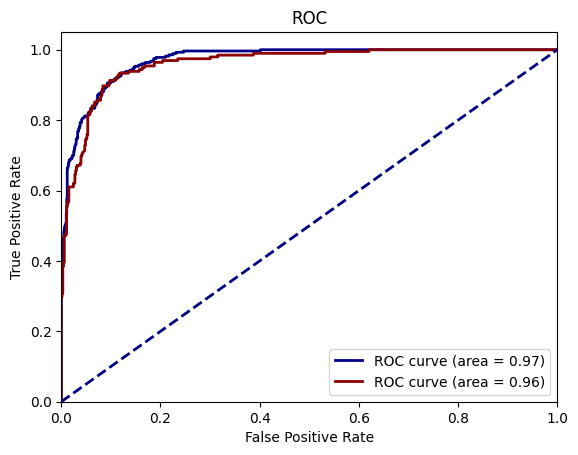

In [46]:
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkblue",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

El modelo por excelencia es SVM gracias a sus hiper parametros, la combinacion de ellos y la seleccion de los mejores para el modelo definitivo, sin embargo, es muy complejo saber que esta pasando por detras en este modelo a comparacion de Naive bayes.

Con respecto a Naive bayes, la eleccion de las variables se debe de hacer con "pinzas" para que nuestro modelo no este sobre entrenado, auqnue cada subalgoritmo funcione con ciertas variables, se puede obervar que usanso en su mayoria del tipo correspondinete y otras, los medelos tienen mejores resultados, elegir la subcategoria dependera del mayor porcentaje de variables en el, por lo cual la clasificacion de variables es de suma importancia.

In [47]:
joblib.dump(svmLineal, 'svm_lineal_modelo.pkl')

['svm_lineal_modelo.pkl']